## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
transcript_input_file = "../Datasets/transcript.csv"
customer_profile_file = "../Data Processing/customer_profile_df.csv"
offers_file = "../Data Processing/offers_df.csv"

transcripts_df = pd.read_csv(transcript_input_file, index_col=0)
customer_profile_df = pd.read_csv(customer_profile_file, index_col=0)
offers_df = pd.read_csv(offers_file, index_col=0)

# change became_member_on from yyyy-mm-dd to yyyy
customer_profile_df['became_member_on'] = pd.to_datetime(customer_profile_df['became_member_on'])
customer_profile_df['became_member_on'] = customer_profile_df['became_member_on'].dt.year

merged_df = transcripts_df.merge(customer_profile_df, on='person', how='left')
merged_df = merged_df.dropna() # drop persons with missing profile

In [3]:
merged_df.head()

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
5  389bc3fa690240e798340f5a15918d5c  offer received   
7  2eeac8d8feae4a8cad5a6af0499a211d  offer received   
8  aa4862eba776480b8bb9c68455b8c2e1  offer received   

                                              value  time  became_member_on  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0            2017.0   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0            2018.0   
5  {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}     0            2018.0   
7  {'offer id': '3f207df678b143eea3cee63160fa8bed'}     0            2017.0   
8  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0            2017.0   

  gender   age    income  total_amt  monthly_freq  \
0      F  75.0  100000.0     159.27           7.0   
2      M  68.0   70000.0      57.73           3.0   
5      M  65.0   53000.0      36.43           3.0   
7      M  58.0   51000.0      15.62           4.0   
8      F  61.0   57000.0      85.55           6.0   

                             txn_times  ave_btwn_time  recency  \
0  [132, 144, 222, 240, 378, 510, 534]           67.0    180.0   
2                      [288, 294, 522]          117.0    192.0   
5                       [60, 498, 600]          270.0    114.0   
7                 [216, 378, 456, 570]          118.0    144.0   
8       [210, 426, 456, 498, 516, 630]           84.0     84.0   

   prop_wks_w_txn  ave_txn_amt  num_offers_received  offer_view_rate  \
0             0.8        22.75                  4.0             1.00   
2             0.4        19.24                  4.0             0.75   
5             0.6        12.14                  6.0             1.00   
7             0.6         3.90                  3.0             0.67   
8             0.6        14.26                  5.0             1.00   

   offer_complete_rate  
0                 0.75  
2                 0.50  
5                 0.83  
7                 0.33  
8                 0.60

In [4]:
offers_df.head()

person                          offer_id  \
0  0011e0d4e6b944f998e987f904e8c1e5  3f207df678b143eea3cee63160fa8bed   
1  0011e0d4e6b944f998e987f904e8c1e5  2298d6c36e964ae4a3e7e9706d1fb8c2   
2  0011e0d4e6b944f998e987f904e8c1e5  5a8bc65990b245e5a138643cd4eb9837   
3  0011e0d4e6b944f998e987f904e8c1e5  0b1e1539f2cc45b7b9fa7c272da2e1d7   
4  0011e0d4e6b944f998e987f904e8c1e5  9b98b8c7a33c4b65b9aebfe6a799e6d9   

   received_time  viewed_time  completed_time  offer_end_time  \
0            0.0          6.0             NaN            96.0   
1          168.0        186.0           252.0           336.0   
2          336.0        354.0             NaN           408.0   
3          408.0        432.0           576.0           648.0   
4          504.0        516.0           576.0           672.0   

                                    unique_offer_id  offer_viewed  \
0     ('3f207df678b143eea3cee63160fa8bed', 0, 3066)             1   
1  ('2298d6c36e964ae4a3e7e9706d1fb8c2', 168, 15774)             1   
2  ('5a8bc65990b245e5a138643cd4eb9837', 336, 28410)             1   
3  ('0b1e1539f2cc45b7b9fa7c272da2e1d7', 408, 41131)             1   
4  ('9b98b8c7a33c4b65b9aebfe6a799e6d9', 504, 53881)             1   

   offer_completed  reward  difficulty  duration     offer_type  num_channels  \
0                0       0           0         4  informational             3   
1                1       3           7         7       discount             4   
2                0       0           0         3  informational             3   
3                1       5          20        10       discount             2   
4                1       5           5         7           bogo             3   

   used_email  used_web  used_social  used_mobile  
0           1         1            0            1  
1           1         1            1            1  
2           1         0            1            1  
3           1         1            0            0  
4           1         1            0            1

## Variable Selection

##### Checking if we should include gender

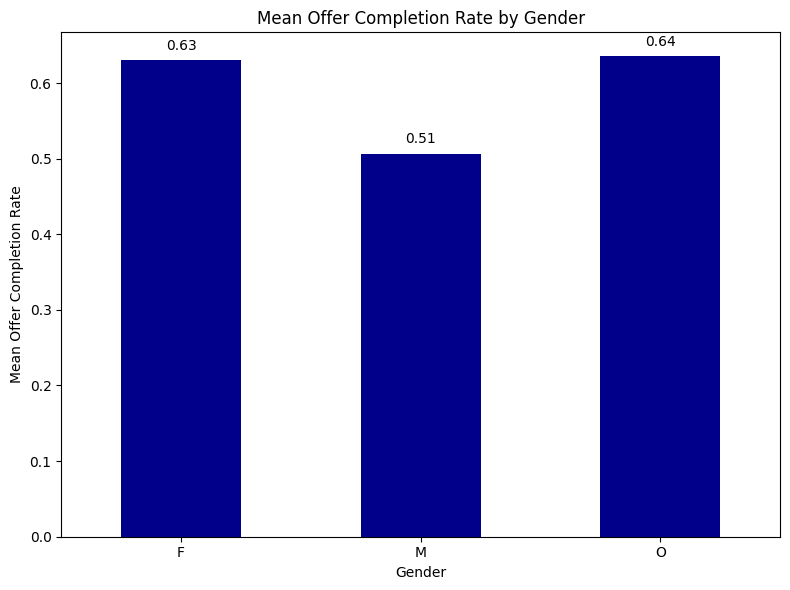

In [5]:
gender_offer_completion = merged_df.groupby('gender')['offer_complete_rate'].mean()

plt.figure(figsize=(8, 6))
ax = gender_offer_completion.plot(kind='bar', color='darkblue')
plt.title('Mean Offer Completion Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Offer Completion Rate')
plt.xticks(rotation=0)

for i, v in enumerate(gender_offer_completion):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()


##### Checking if we should include membership year

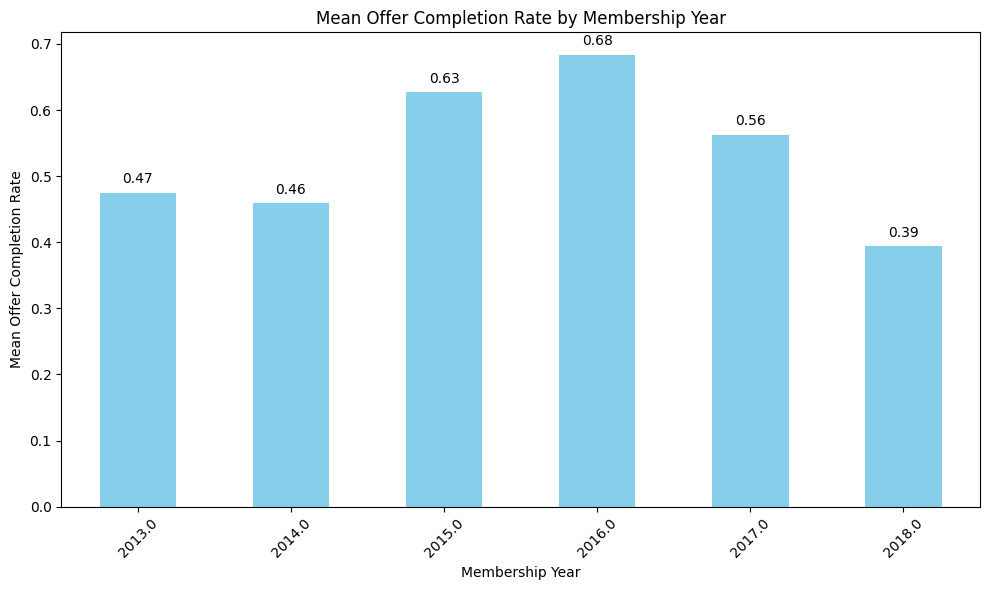

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by membership year and calculate the mean offer_complete_rate for each year
membership_year_offer_completion = merged_df.groupby('became_member_on')['offer_complete_rate'].mean()

# Plotting
plt.figure(figsize=(10, 6))
ax = membership_year_offer_completion.plot(kind='bar', color='skyblue')
plt.title('Mean Offer Completion Rate by Membership Year')
plt.xlabel('Membership Year')
plt.ylabel('Mean Offer Completion Rate')
plt.xticks(rotation=45)

for i, v in enumerate(membership_year_offer_completion):
    ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', color='black')
    
plt.tight_layout()
plt.show()


#### Final Variable Selection & Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

selected_variables = ['became_member_on', 'age', 'income', 'monthly_freq', 'recency', 'ave_txn_amt', 'offer_view_rate', 'offer_complete_rate']
data_for_clustering = merged_df[selected_variables]

# check for and handle missing values just in case
data_for_clustering.dropna(inplace=True)

# scale data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

## Determine Number of Clusters

### Elbow Method

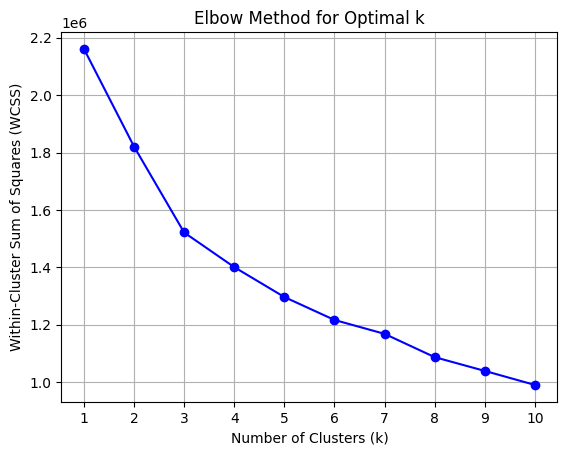

In [8]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.show()


### Silhouette Method (takes too long to run...)

In [ ]:
""" from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 6)

sil_scores = []
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    sil_score = silhouette_score(scaled_data, cluster_labels)
    sil_scores.append(sil_score)

optimal_num_clusters = range_n_clusters[np.argmax(sil_scores)]

print("Optimal number of clusters:", optimal_num_clusters)

plt.plot(range_n_clusters, sil_scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 11))
plt.grid(True)
plt.show() """

### Variance Ratio Criterion (VRC)

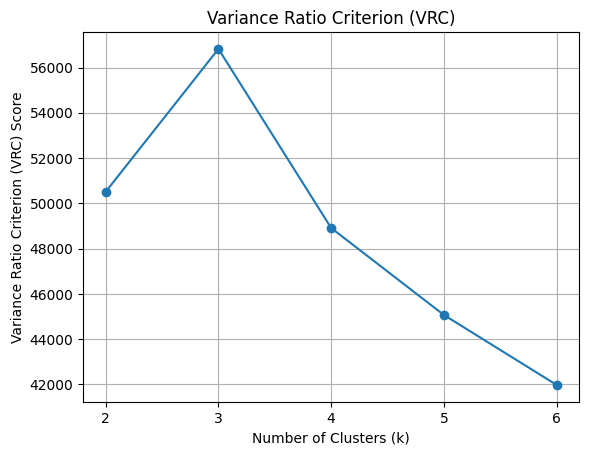

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

k_values = range(2, 7)

vrc_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)  
    vrc_score = calinski_harabasz_score(scaled_data, kmeans.labels_)
    vrc_scores.append(vrc_score)

plt.plot(k_values, vrc_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Variance Ratio Criterion (VRC) Score')
plt.title('Variance Ratio Criterion (VRC)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


## K-Means Clustering

In [10]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# add cluster labels to the original dataframe
merged_df['cluster'] = cluster_labels

In [13]:
merged_df.head()

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
5  389bc3fa690240e798340f5a15918d5c  offer received   
7  2eeac8d8feae4a8cad5a6af0499a211d  offer received   
8  aa4862eba776480b8bb9c68455b8c2e1  offer received   

                                              value  time  became_member_on  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0            2017.0   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0            2018.0   
5  {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}     0            2018.0   
7  {'offer id': '3f207df678b143eea3cee63160fa8bed'}     0            2017.0   
8  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0            2017.0   

  gender   age    income  total_amt  monthly_freq  \
0      F  75.0  100000.0     159.27           7.0   
2      M  68.0   70000.0      57.73           3.0   
5      M  65.0   53000.0      36.43           3.0   
7      M  58.0   51000.0      15.62           4.0   
8      F  61.0   57000.0      85.55           6.0   

                             txn_times  ave_btwn_time  recency  \
0  [132, 144, 222, 240, 378, 510, 534]           67.0    180.0   
2                      [288, 294, 522]          117.0    192.0   
5                       [60, 498, 600]          270.0    114.0   
7                 [216, 378, 456, 570]          118.0    144.0   
8       [210, 426, 456, 498, 516, 630]           84.0     84.0   

   prop_wks_w_txn  ave_txn_amt  num_offers_received  offer_view_rate  \
0             0.8        22.75                  4.0             1.00   
2             0.4        19.24                  4.0             0.75   
5             0.6        12.14                  6.0             1.00   
7             0.6         3.90                  3.0             0.67   
8             0.6        14.26                  5.0             1.00   

   offer_complete_rate  cluster  
0                 0.75        1  
2                 0.50        0  
5                 0.83        1  
7                 0.33        0  
8                 0.60        1

In [15]:
merged_segmented = merged_df.copy()
file_path = 'C:/Users/ASUS/Downloads/BT4211-Starbucks/Datasets/merged_segmented.csv'
merged_segmented.to_csv(file_path, index=False)

## Cluster Visualisation

### Pairplot

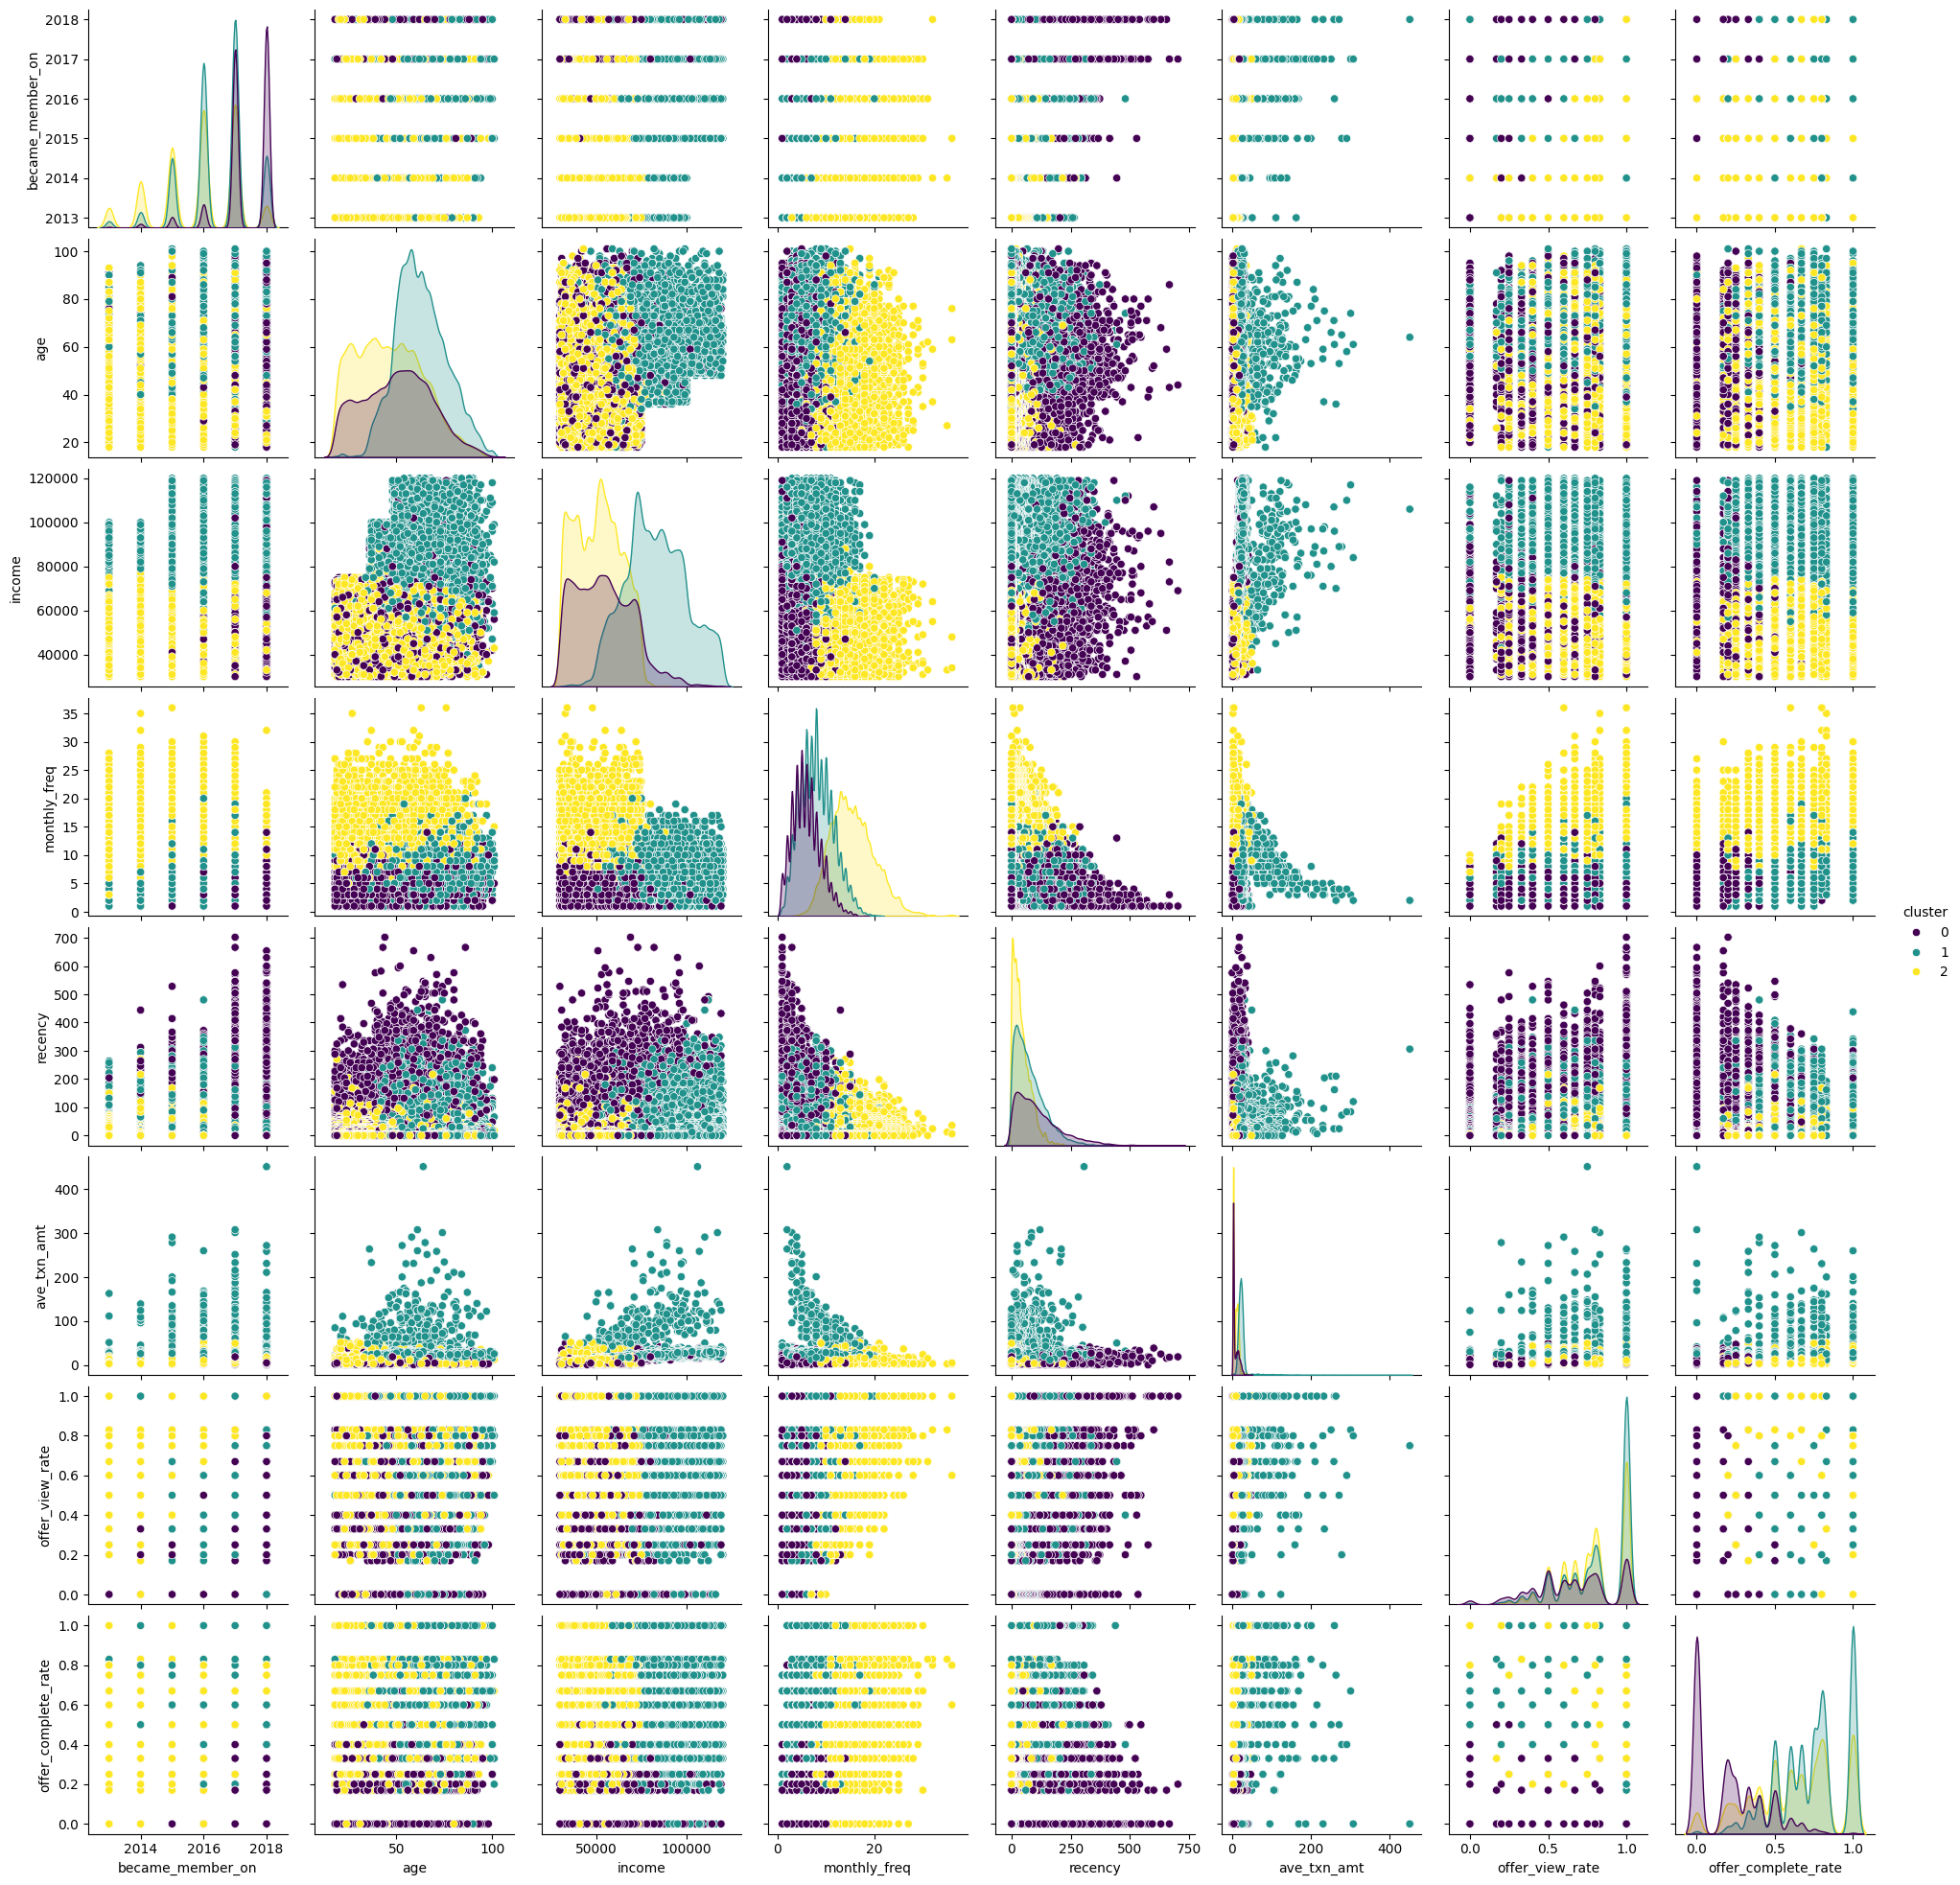

In [11]:
import seaborn as sns

# Plot pairplot
sns.pairplot(merged_df, vars=selected_variables, hue='cluster', palette='viridis')
plt.show()

### Scatterplot

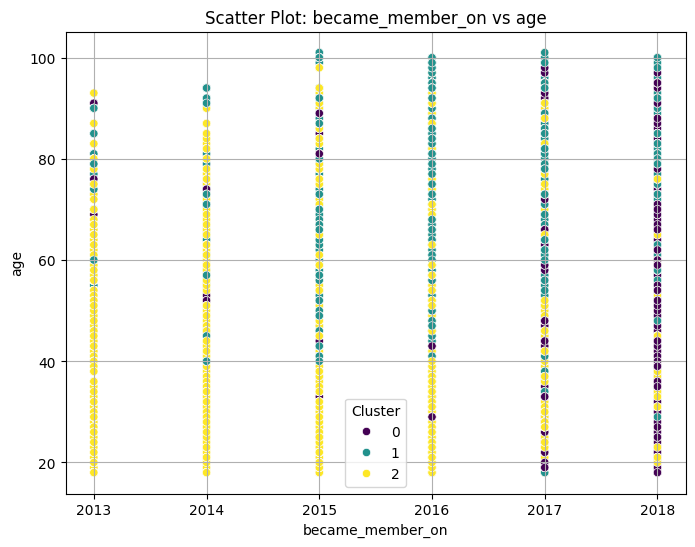

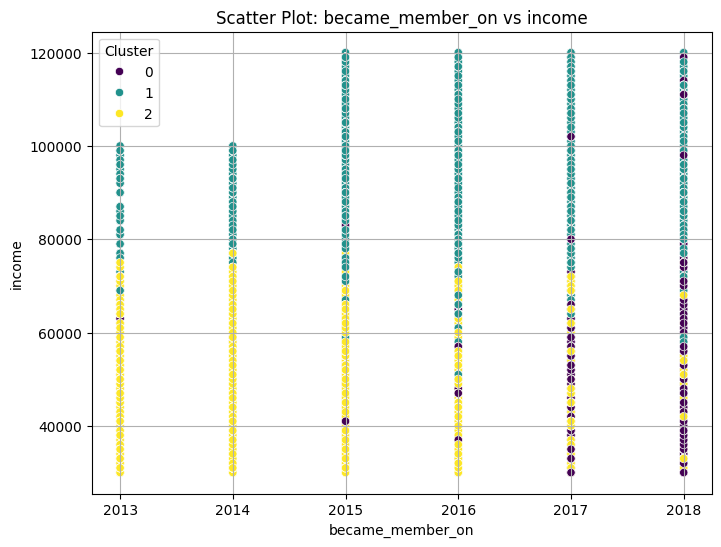

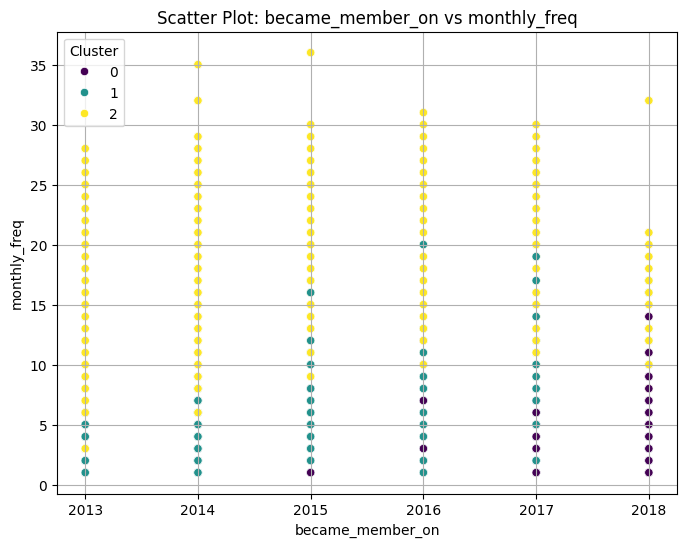

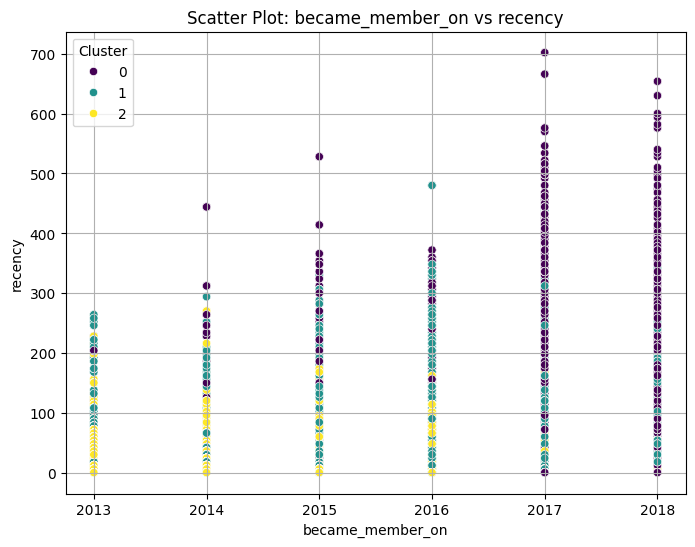

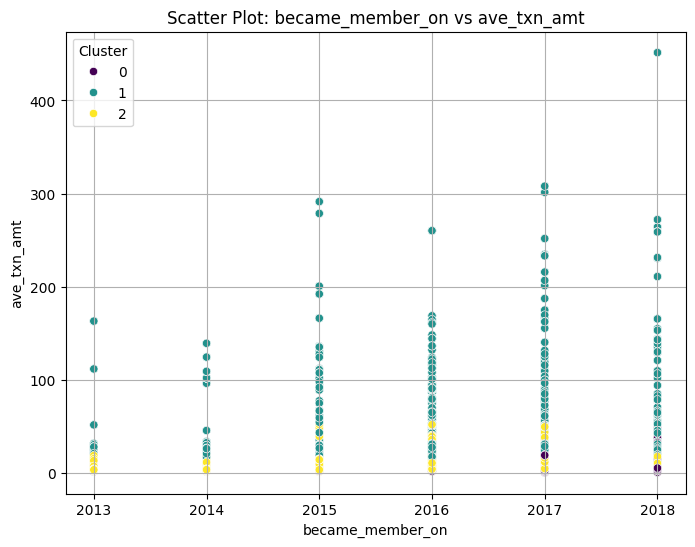

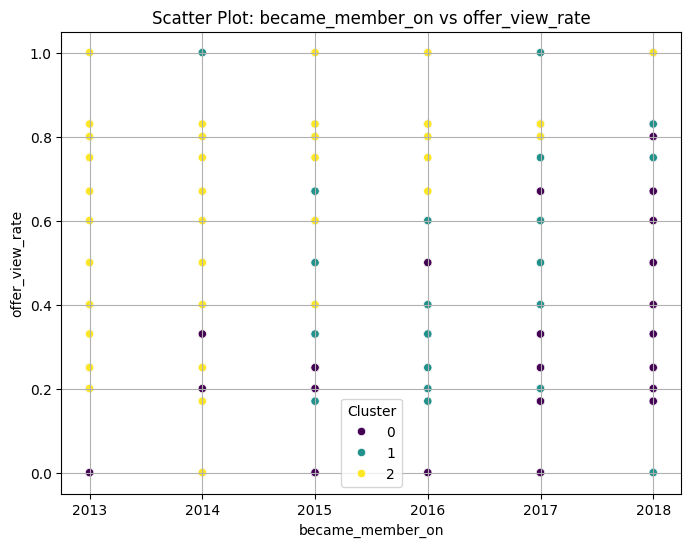

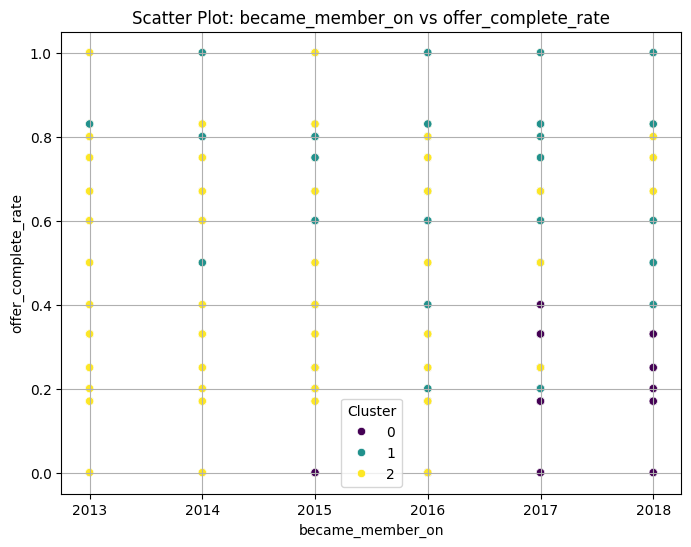

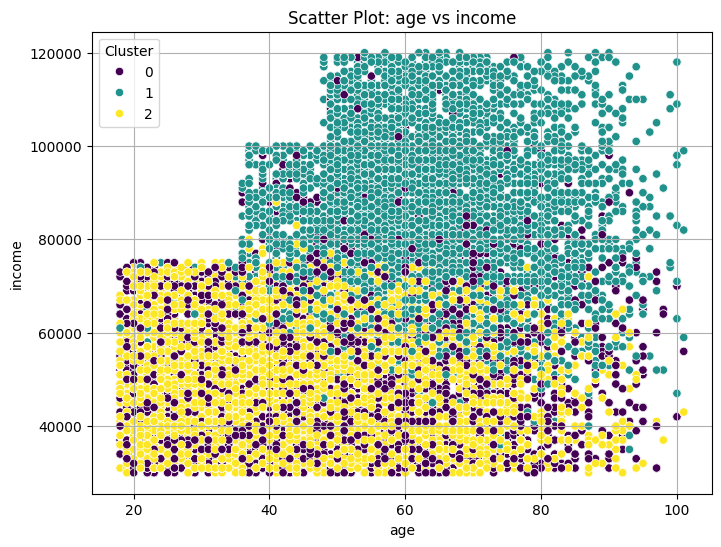

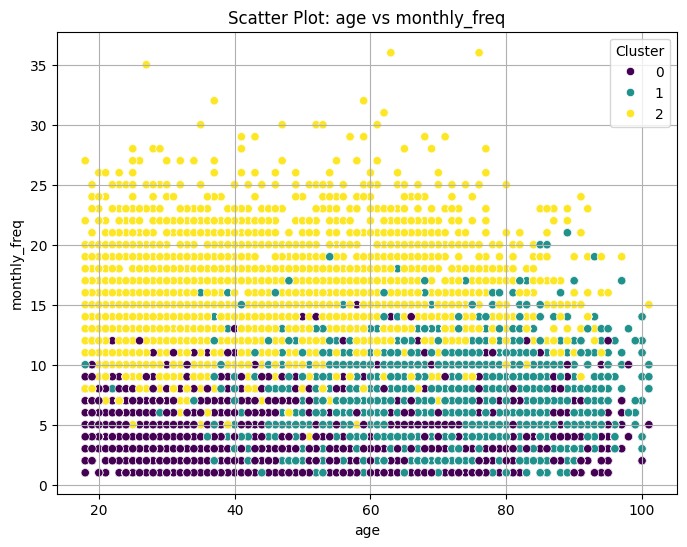

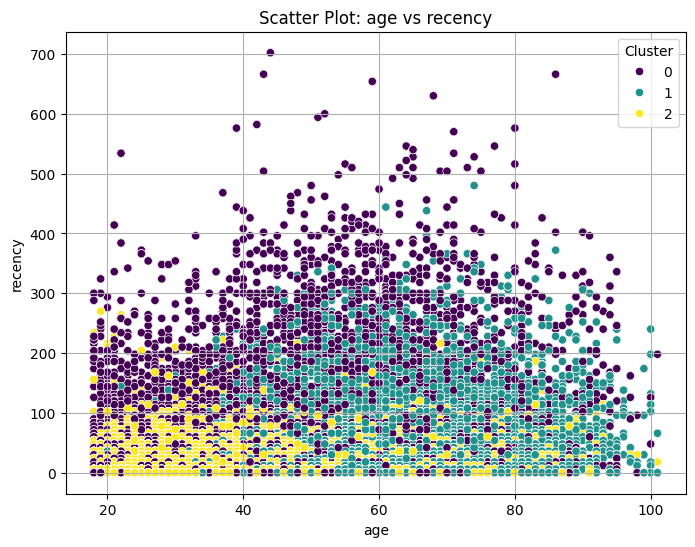

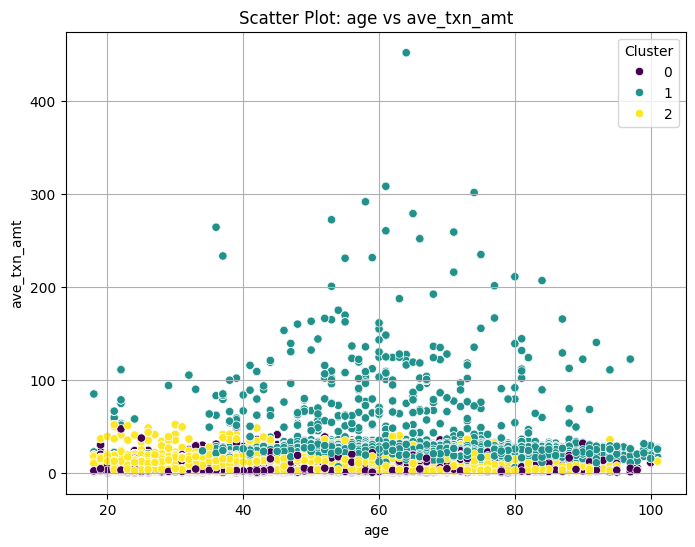

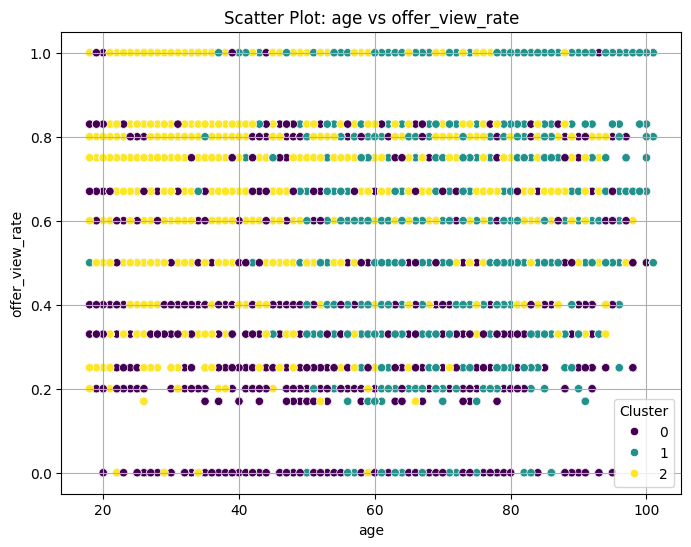

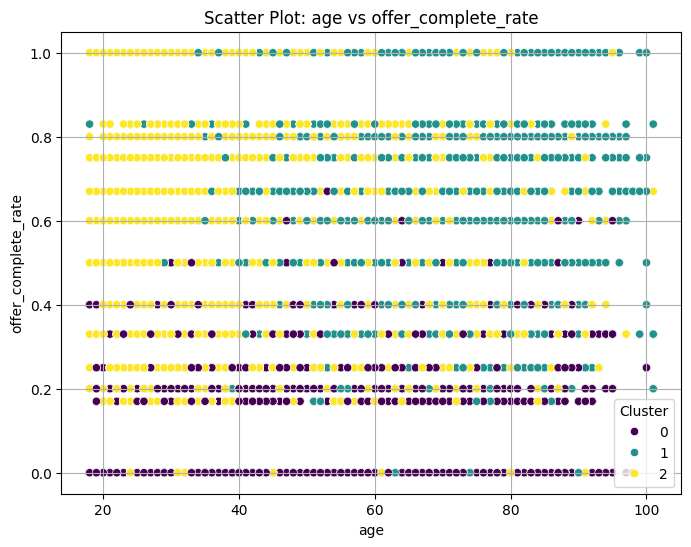

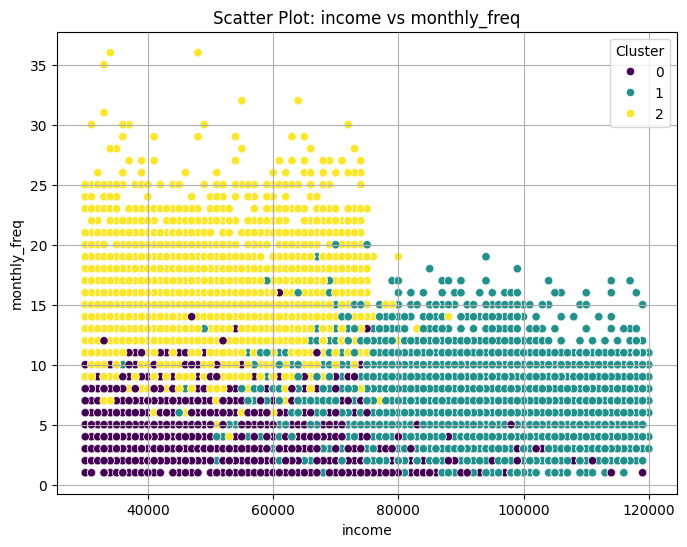

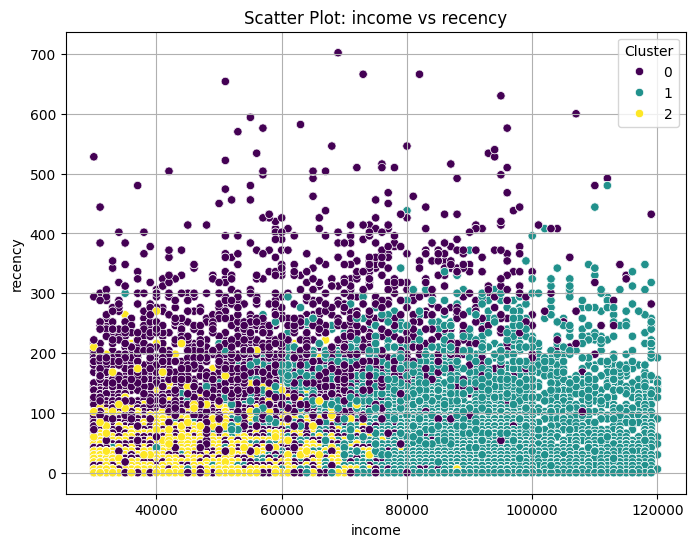

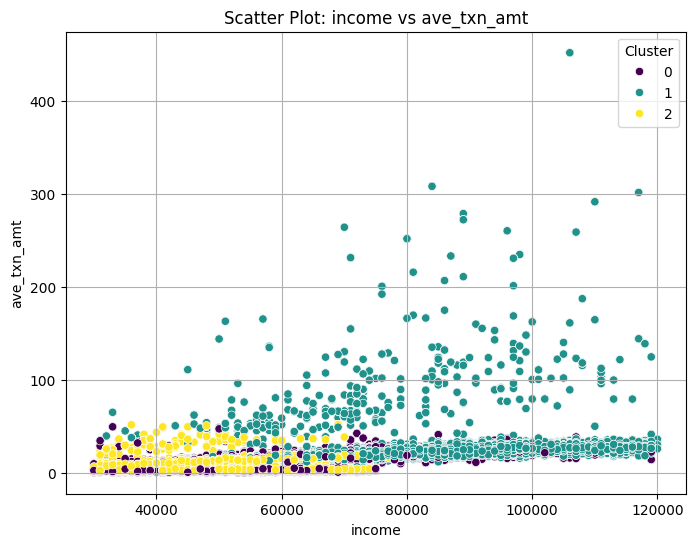

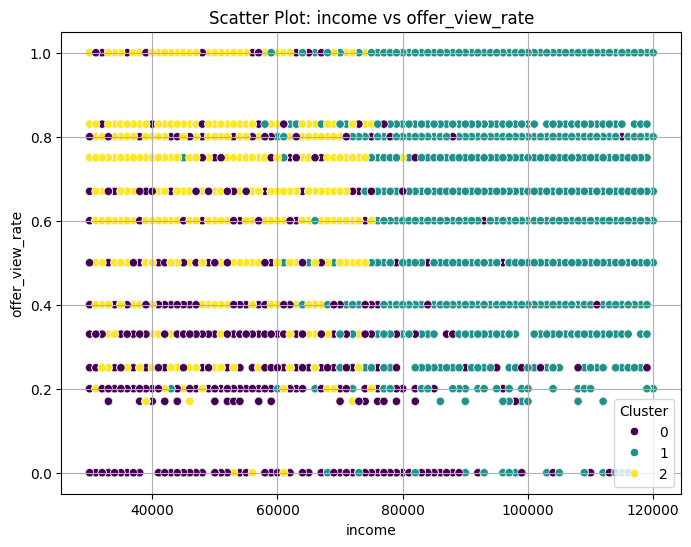

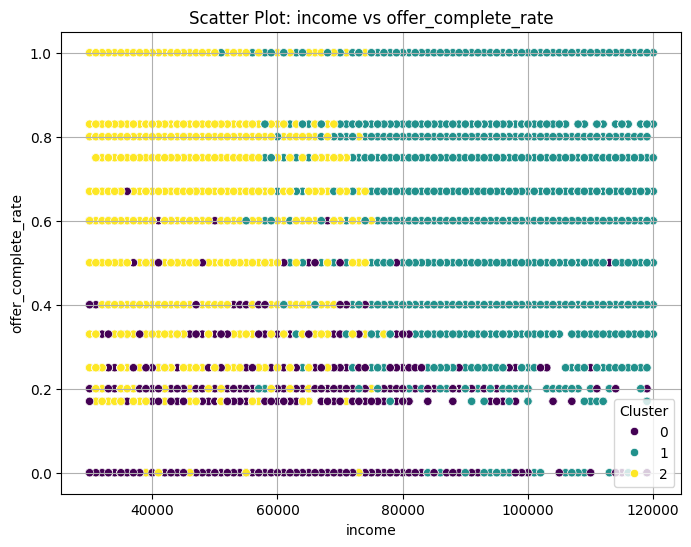

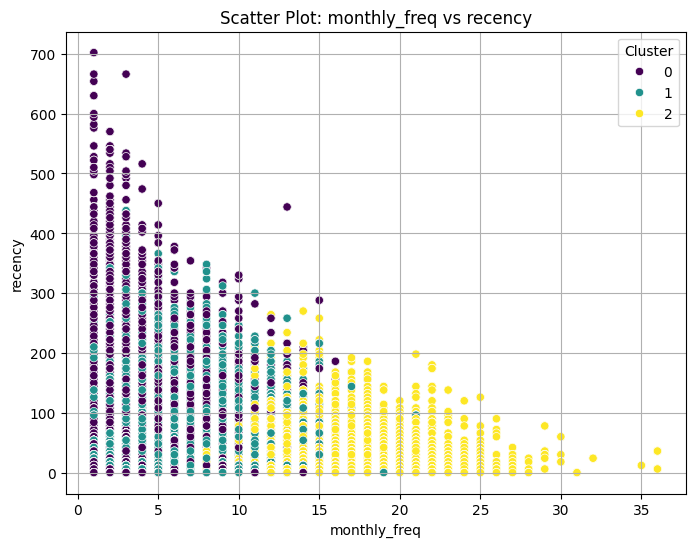

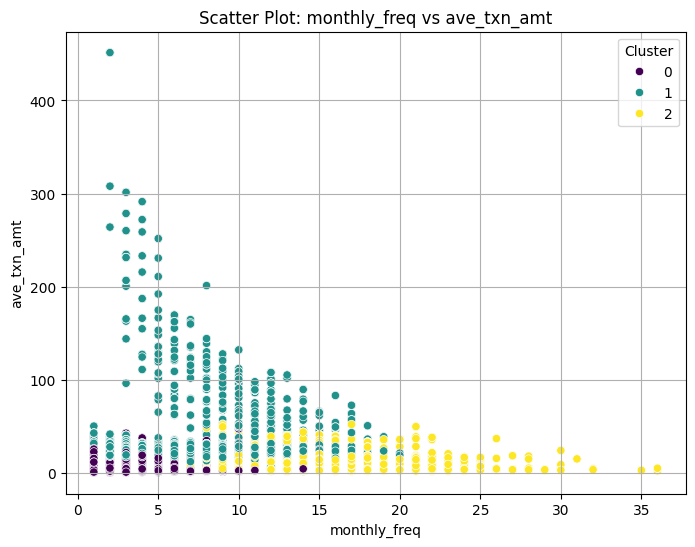

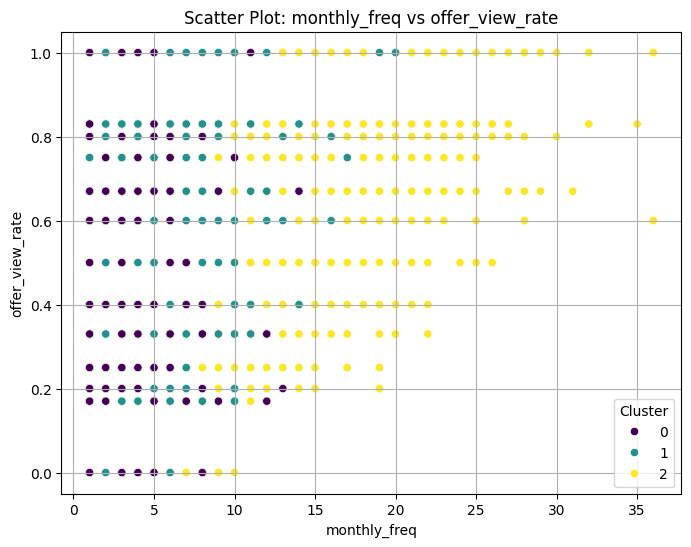

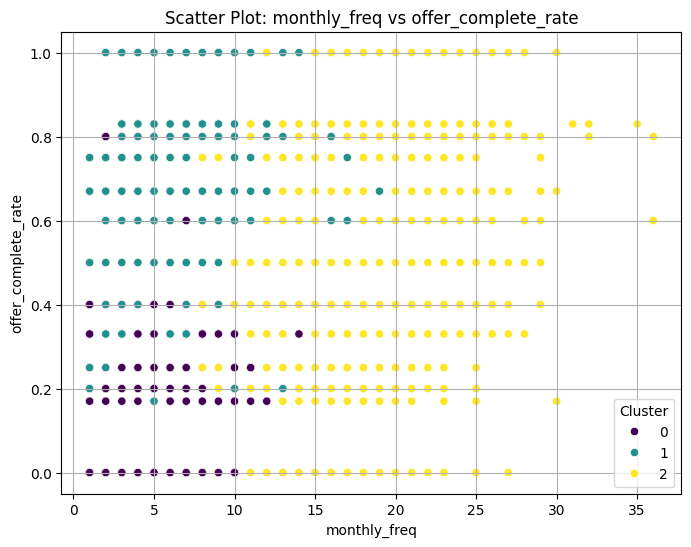

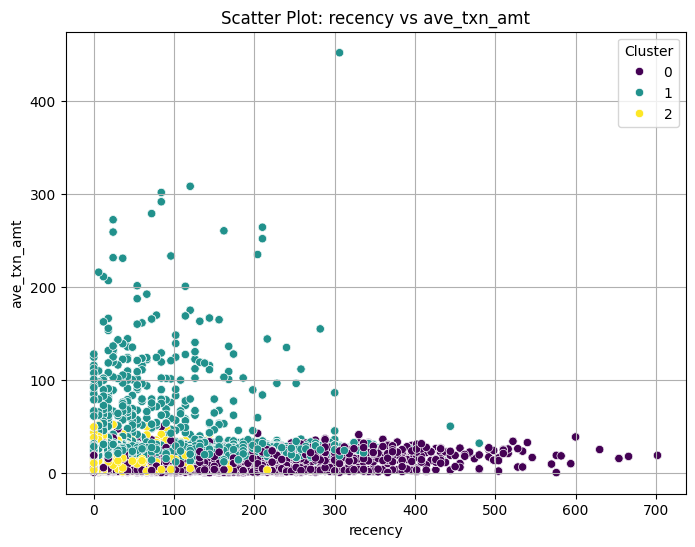

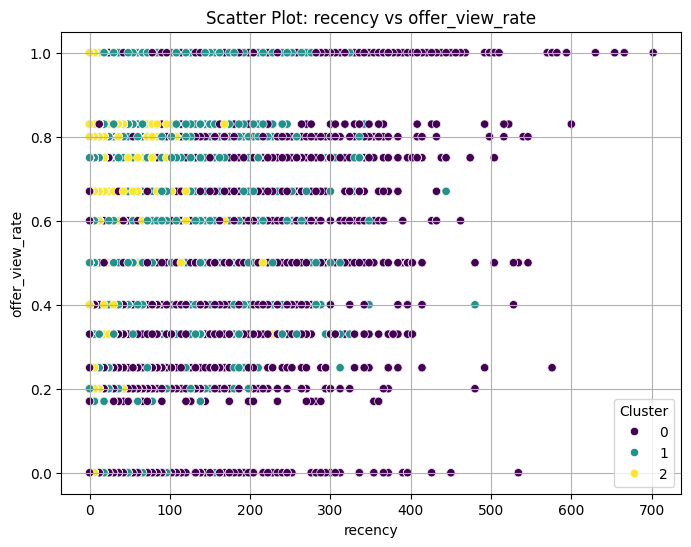

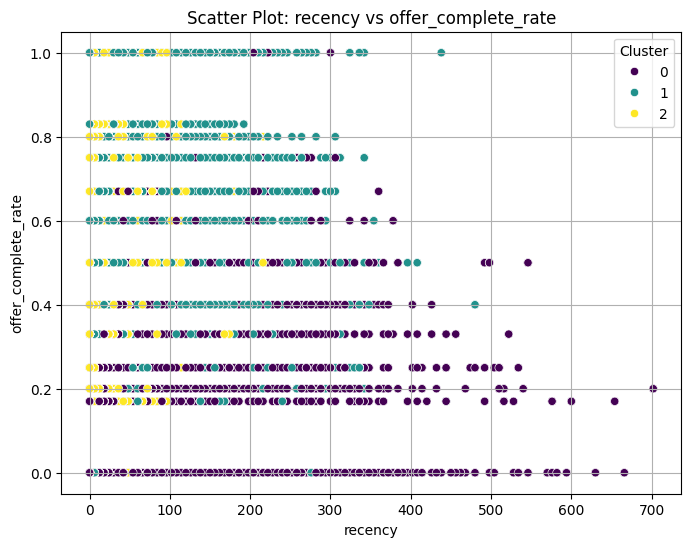

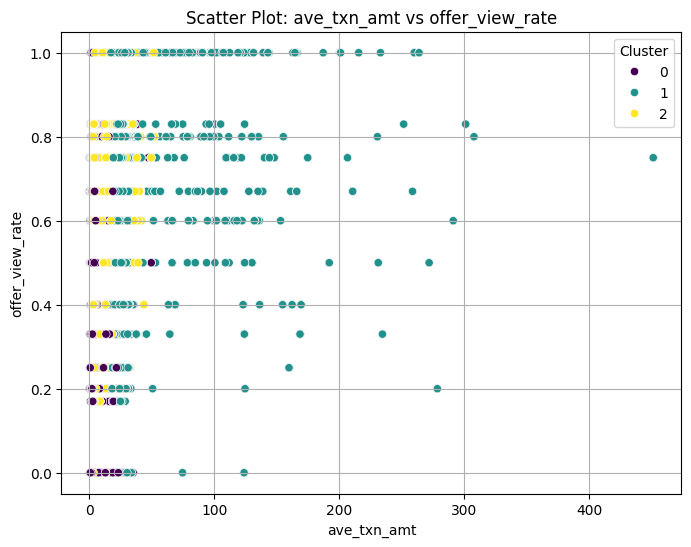

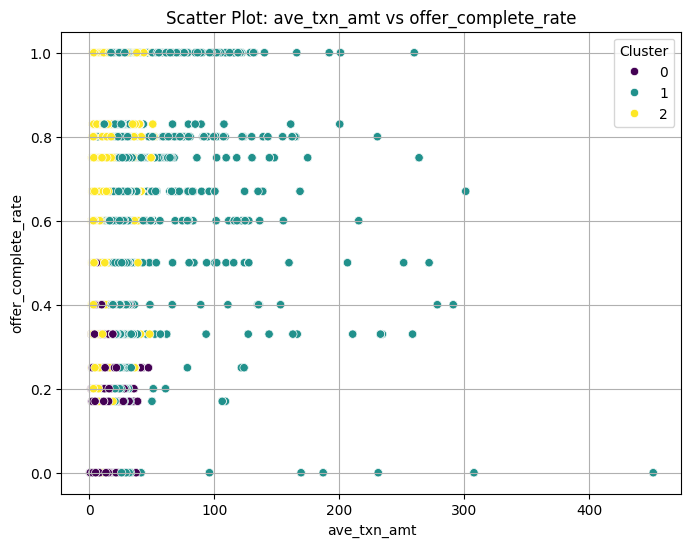

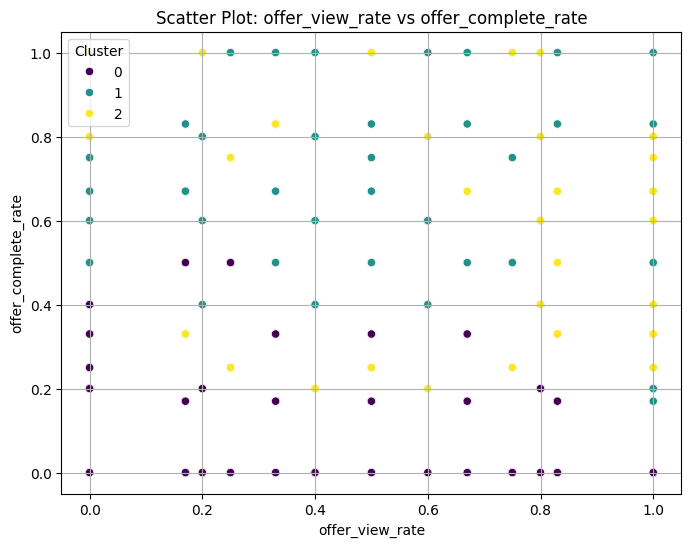

In [95]:
for i in range(len(selected_variables)):
    for j in range(i+1, len(selected_variables)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=merged_df, x=selected_variables[i], y=selected_variables[j], hue='cluster', palette='viridis')
        plt.title(f'Scatter Plot: {selected_variables[i]} vs {selected_variables[j]}')
        plt.xlabel(selected_variables[i])
        plt.ylabel(selected_variables[j])
        plt.legend(title='Cluster')
        plt.grid(True)
        plt.show()

### Comparing each segment against the mean of each variable

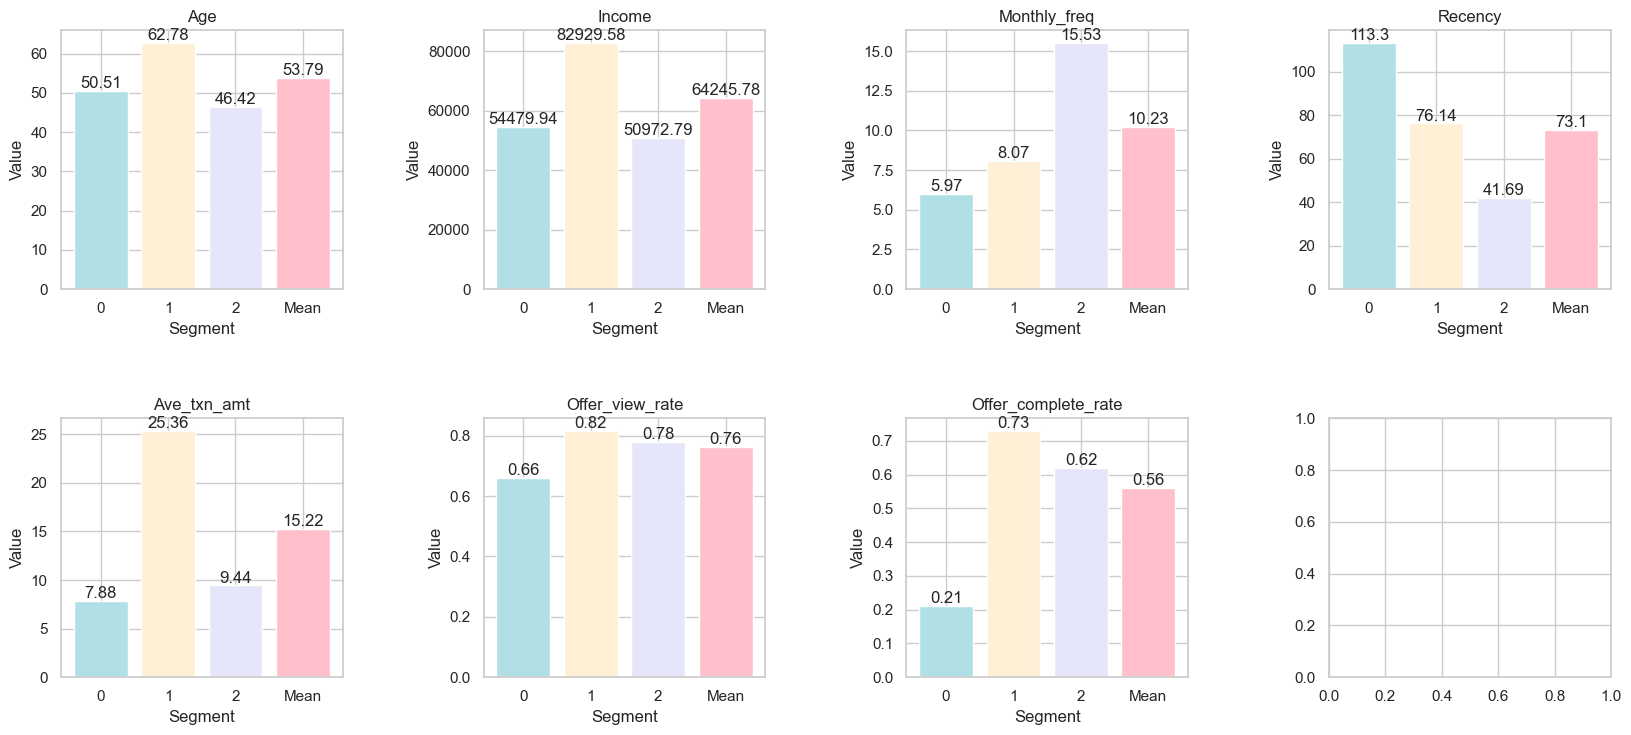

In [129]:
metrics = ['age', 'income', 'monthly_freq', 'recency', 'ave_txn_amt', 'offer_view_rate', 'offer_complete_rate']

# calculate the mean values for each metric across all segments
mean_values = {}
for metric in metrics:
    mean_values[metric] = merged_df[metric].mean()

num_metrics = len(metrics)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 1.2*num_metrics))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.flatten()
segment_colors = ['powderblue', 'papayawhip', 'lavender']
mean_color = 'pink'

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.set_title(metric.capitalize())

    # plot bar chart comparing each segment's value for that metric against the mean
    bars = ax.bar(['0', '1', '2', 'Mean'], 
                  [merged_df[merged_df['cluster'] == 0][metric].mean(),
                   merged_df[merged_df['cluster'] == 1][metric].mean(),
                   merged_df[merged_df['cluster'] == 2][metric].mean(),
                   mean_values[metric]],
                  color=[segment_colors[0], segment_colors[1], segment_colors[2], mean_color])

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

    ax.set_ylabel('Value')
    ax.set_xlabel('Segment')

plt.show()


In [131]:
# print the mean values for each metric across all segments
for metric in metrics:
    print(f"Mean {metric.capitalize()} values:")
    print(f"Segment 0: {round(merged_df[merged_df['cluster'] == 0][metric].mean(), 2)}")
    print(f"Segment 1: {round(merged_df[merged_df['cluster'] == 1][metric].mean(), 2)}")
    print(f"Segment 2: {round(merged_df[merged_df['cluster'] == 2][metric].mean(), 2)}")
    print(f"Overall Mean: {round(mean_values[metric], 2)}")
    print()

Mean Age values:
Segment 0: 50.51
Segment 1: 62.78
Segment 2: 46.42
Overall Mean: 53.79

Mean Income values:
Segment 0: 54479.94
Segment 1: 82929.58
Segment 2: 50972.79
Overall Mean: 64245.78

Mean Monthly_freq values:
Segment 0: 5.97
Segment 1: 8.07
Segment 2: 15.53
Overall Mean: 10.23

Mean Recency values:
Segment 0: 113.3
Segment 1: 76.14
Segment 2: 41.69
Overall Mean: 73.1

Mean Ave_txn_amt values:
Segment 0: 7.88
Segment 1: 25.36
Segment 2: 9.44
Overall Mean: 15.22

Mean Offer_view_rate values:
Segment 0: 0.66
Segment 1: 0.82
Segment 2: 0.78
Overall Mean: 0.76

Mean Offer_complete_rate values:
Segment 0: 0.21
Segment 1: 0.73
Segment 2: 0.62
Overall Mean: 0.56



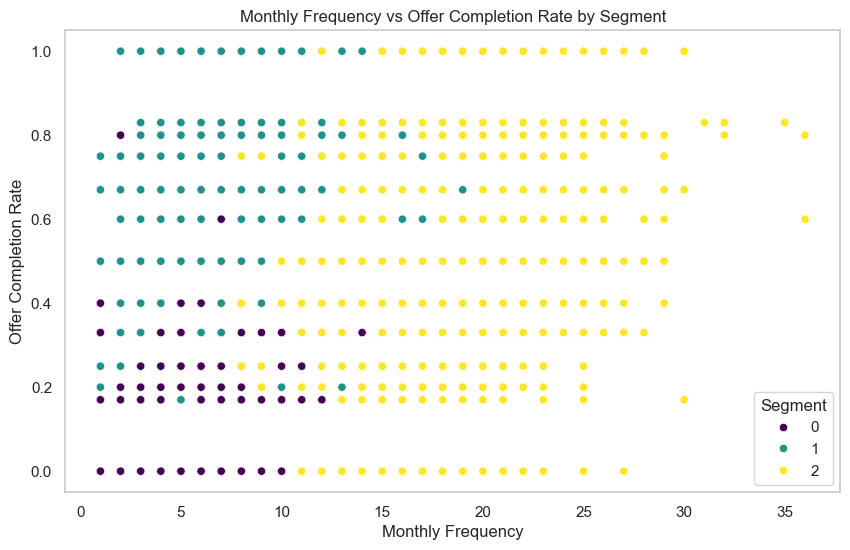

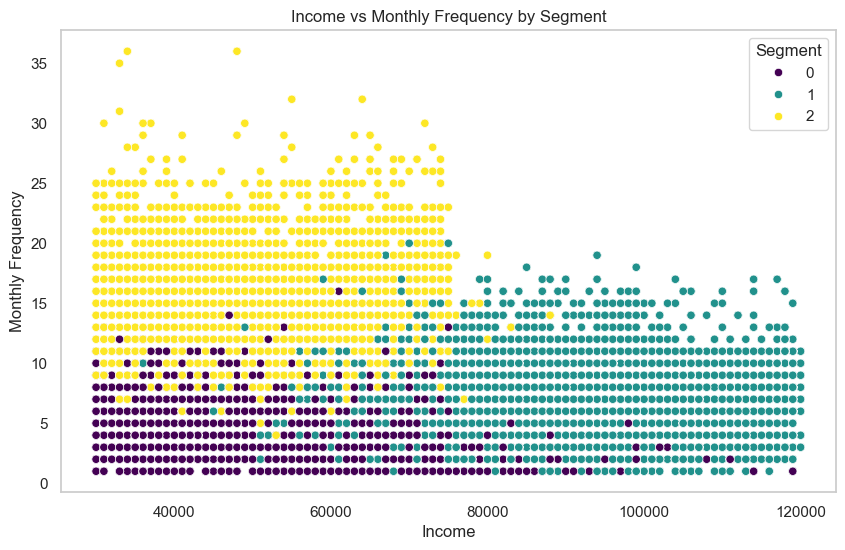

In [135]:
# monthly_Freq vs offer_complete_rate grouped by segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='monthly_freq', y='offer_complete_rate', hue='cluster', palette='viridis')
plt.title('Monthly Frequency vs Offer Completion Rate by Segment')
plt.xlabel('Monthly Frequency')
plt.ylabel('Offer Completion Rate')
plt.legend(title='Segment')
plt.grid(False)
plt.show()

# income vs monthly_Freq grouped by segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='income', y='monthly_freq', hue='cluster', palette='viridis')
plt.title('Income vs Monthly Frequency by Segment')
plt.xlabel('Income')
plt.ylabel('Monthly Frequency')
plt.legend(title='Segment')
plt.grid(False)
plt.show()
